In [2]:
from nn import MLP, Neuron, Layer
from engine import Value

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
np.random.seed(1337)
random.seed(1337)

### prepare the dataset

In [5]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, noise = 0.1)

In [6]:
y = y*2 - 1 # make y be -1 or 1

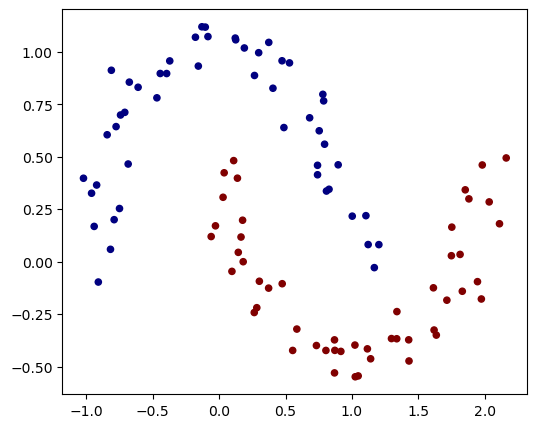

In [10]:
plt.figure(figsize = (6, 5))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 20, cmap = 'jet')
plt.show()

### initialize the model

In [11]:
# 2 layer neural network
model = MLP(2, [16, 16, 1])
print(model)
print("number of parameters: ", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]
number of parameters:  337


### Loss function

In [13]:
def loss(batch_size = None):

    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]

    # forward the model to get scores
    scores = list(map(model, inputs))

    # svm 'max-margin' loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses)) # mean of loss

    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss

    # accuracy
    accuracy = [(yi > 0) == (scorei.data >0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum (accuracy) / len(accuracy)


## optimization

In [15]:
for k in range(100):

    # forward pass
    total_loss, acc = loss()

    # backward
    model.zero_grad()
    total_loss.backward()

    # update(optimizer step)
    #sgd
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    if k % 1 == 0:
        print(f"step {k} | loss {total_loss.data} | accuracy {acc*100}%")

step 0 | loss 0.8958441028683222 | accuracy 50.0%
step 1 | loss 1.7235905336972022 | accuracy 81.0%
step 2 | loss 0.7429006313851131 | accuracy 77.0%
step 3 | loss 0.7705641260584201 | accuracy 82.0%
step 4 | loss 0.3692793385976537 | accuracy 84.0%
step 5 | loss 0.31354548191852194 | accuracy 86.0%
step 6 | loss 0.2814234349772435 | accuracy 89.0%
step 7 | loss 0.26888733313983904 | accuracy 91.0%
step 8 | loss 0.2567147286057417 | accuracy 91.0%
step 9 | loss 0.27048625516379216 | accuracy 91.0%
step 10 | loss 0.24507023853658047 | accuracy 91.0%
step 11 | loss 0.2509905529791503 | accuracy 92.0%
step 12 | loss 0.21560951851922958 | accuracy 91.0%
step 13 | loss 0.2309037844640272 | accuracy 93.0%
step 14 | loss 0.20152151227899456 | accuracy 92.0%
step 15 | loss 0.2257450627928222 | accuracy 93.0%
step 16 | loss 0.19447987596204114 | accuracy 92.0%
step 17 | loss 0.21089496199246355 | accuracy 93.0%
step 18 | loss 0.15983077356303607 | accuracy 94.0%
step 19 | loss 0.184537487468839

### plot decision boundary

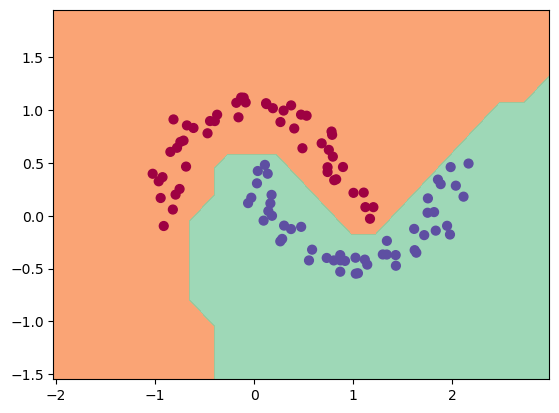

In [20]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap = plt.cm.Spectral, alpha = 0.8)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()
